# Implements a Y-Network

# Library

In [47]:
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


In [12]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe, fe, scoring, deep_learning, visual

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [3]:
# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Label

In [4]:
# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reshape and normalize

In [5]:
# reshape and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Parameter

In [6]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

# Y Network Model

In [7]:
model = deep_learning.y_network_model(input_shape,n_filters,kernel_size,dropout,3,10)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
______________________________________________________________________________________________

## Graph

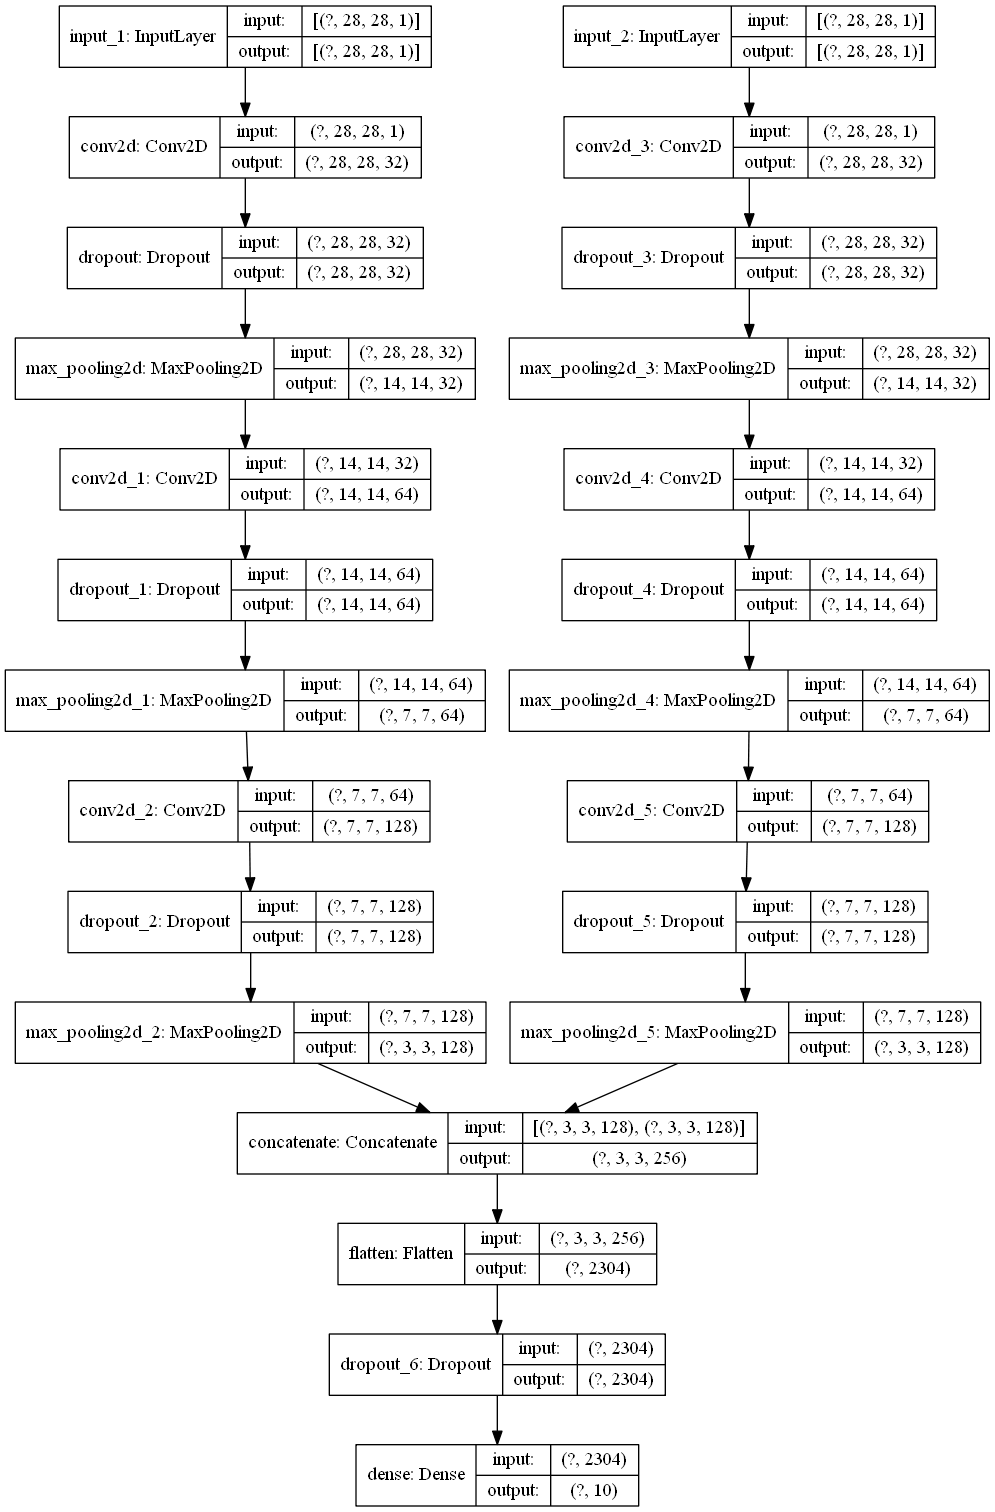

In [8]:
deep_learning.show_architecture(model,'cnn-y-network.png')

# Compile

In [9]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training

In [11]:
# train the model with input images and labels
history = model.fit([x_train, x_train],
          y_train, 
          validation_data=([x_test, x_test], y_test),
          epochs=20,
          batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 449us/sample - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.0928 - val_accuracy: 0.9854
Epoch 2/20
60000/60000 [==============================] - 27s 445us/sample - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0825 - val_accuracy: 0.9907
Epoch 3/20
60000/60000 [==============================] - 27s 445us/sample - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0643 - val_accuracy: 0.9911
Epoch 4/20
60000/60000 [==============================] - 27s 450us/sample - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0639 - val_accuracy: 0.9921
Epoch 5/20
60000/60000 [==============================] - 28s 469us/sample - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.0608 - val_accuracy: 0.9920
Epoch 6/20
60000/60000 [==============================] - 29s 486us/sample - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0562 - val_accuracy: 0.9916
Epoch 7/20
60000/60000 [====================

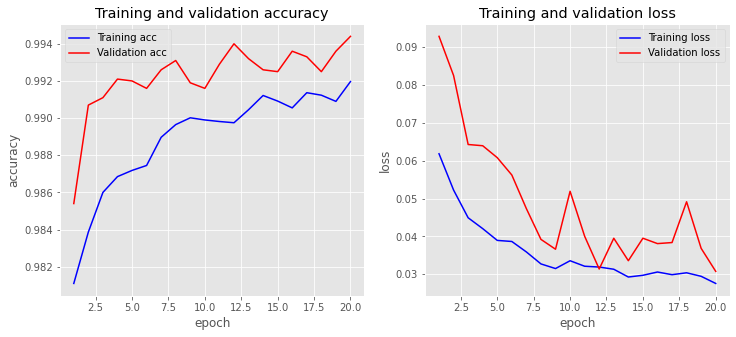

In [25]:
visual.plot_nn(history)

# evaluation at test dataset

In [26]:
# model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                       y_test,
                       batch_size=batch_size,
                       verbose=0)

In [28]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.4%


In [60]:
labels = [0,1,2,3,4,5,6,7,8,9]

10000/10000 [==============================] - 2s 154us/sample
comfusion matrix = 
[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    1 1020    1    0    0    0    6    2    1]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    0    0    3    0  886    1    0    0    1]
 [   3    6    0    0    0    0  947    0    2    0]
 [   0    3    2    0    0    0    0 1023    0    0]
 [   1    0    0    0    1    1    0    0  970    1]
 [   0    1    0    0    4    3    0    2    1  998]]

accuracy_score =  0.9944
balanced_accuracy_score =  0.9944

precision score =  0.9944
recall score =  0.9944
fp= [ 6. 11.  3.  5.  5.  6.  1.  8.  6.  5.]
fn= [ 0.  2. 12.  3.  2.  6. 11.  5.  4. 11.]
tp= [ 980. 1133. 1020. 1007.  980.  886.  947. 1023.  970.  998.]
tn= [9014. 8854. 8965. 8985. 9013. 9102. 9041. 8964. 9020. 8986.]

F1 score =  0.9944
F2 score =  [0.9951 0.9919 0.995

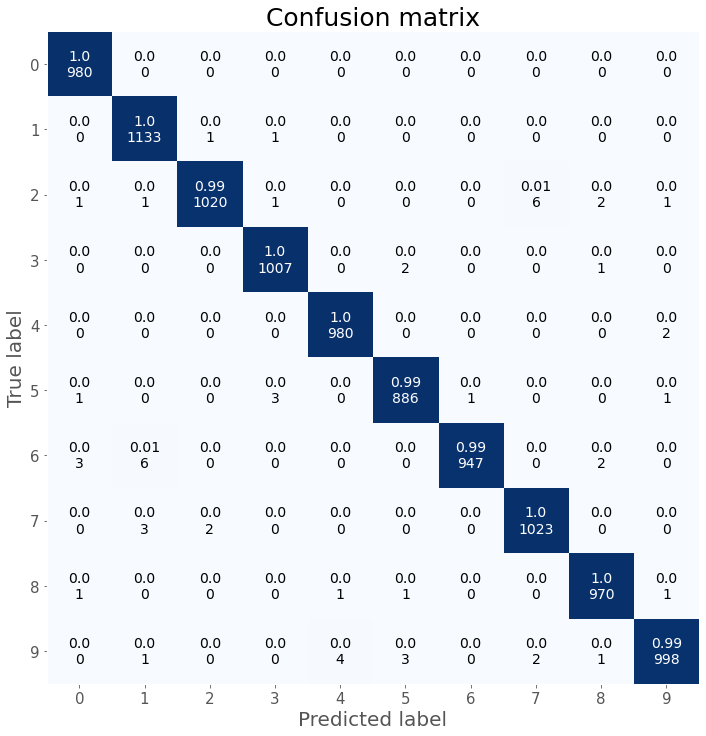


time span=  0:00:01.565998


In [64]:
y_test,yhat_classes_conv,yhat_probs = deep_learning.predict_model(model,[x_test, x_test],y_test,'multi','ovo',labels)